In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [17]:
data = pd.read_csv('synthetic_financial_transactions.csv', dayfirst=True)
data.sample(7)

,Transaction_ID,Date,Transaction_Type,Department,Vendor,Payment_Method,Category,Approved_by,Recurring,Project_Code,Amount,Is_Fraudulent
584,bb16881f-24ec-42dc-8e43-bb5b3167dea1,2024-02-02,transfer,Finance,"Valdez, Robinson and Fernandez",card,training,HR_Manager,False,PRJ_013,-1243.69,False
197,cbbfe049-57c9-4919-9a8d-dce2f712bbb7,2023-10-01,expense,Marketing,Stevens Group,bank_transfer,training,CFO,True,PRJ_017,-6151.76,False
376,3bdd4168-281d-40b4-9476-f1b677a83a1e,2024-05-23,expense,HR,Blankenship and Sons,bank_transfer,operational,CTO,False,PRJ_008,-6540.77,False
427,87bb5467-736f-4fd1-bdb1-df7a534481e3,2022-02-08,refund,HR,Hays-Thomas,card,operational,CTO,False,PRJ_016,557.68,False
11,26fc9cfc-bcb1-45bb-873e-f2853af02055,2023-02-06,income,Finance,George-Carpenter,card,travel,CEO,True,PRJ_010,12969.58,False
468,6f140034-b5ab-44b0-b9e9-03e4bdbc65b2,2023-08-04,expense,HR,"Gomez, Hopkins and Thompson",bank_transfer,salary,CFO,True,PRJ_013,-6002.49,False
209,58de4f41-d3f1-46f6-a512-fa46b6e4af5b,2022-12-28,expense,Finance,"Watts, Lawson and Durham",card,training,CEO,False,PRJ_007,-1983.90,False


In [18]:
data.shape

(600, 12)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    600 non-null    object 
 1   Date              600 non-null    object 
 2   Transaction_Type  600 non-null    object 
 3   Department        600 non-null    object 
 4   Vendor            588 non-null    object 
 5   Payment_Method    600 non-null    object 
 6   Category          588 non-null    object 
 7   Approved_by       588 non-null    object 
 8   Recurring         600 non-null    bool   
 9   Project_Code      588 non-null    object 
 10  Amount            600 non-null    float64
 11  Is_Fraudulent     600 non-null    bool   
dtypes: bool(2), float64(1), object(9)
memory usage: 48.2+ KB


In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Transaction_ID,Date,Transaction_Type,Department,Vendor,Payment_Method,Category,Approved_by,Recurring,Project_Code,Amount,Is_Fraudulent
0,3f07a2a7-626d-45f5-b941-befd80169997,2022-11-15,expense,R&D,Hood Ltd,card,training,NaN,False,PRJ_016,-4337.03,False
1,9dffc6ab-d54b-464b-a088-3b398a8405ee,2022-03-18,investment,IT,"Valdez, Robinson and Fernandez",card,salary,CEO,True,PRJ_005,-12397.23,False
2,78fdc409-c3a2-49e8-942d-95b9cee9d122,2021-05-14,expense,HR,"Henry, Hill and Johnson",bank_transfer,software,CTO,False,PRJ_008,-5348.30,False
3,18b9261e-5318-4d28-8d65-8ff4efe294d5,2021-08-05,expense,Finance,Ford-Murphy,cash,salary,HR_Manager,False,PRJ_019,-2891.18,False
4,26ffeeee-5108-457e-8d74-fba0180aa3f2,2023-06-03,income,R&D,"Lewis, Carroll and Walker",card,operational,CEO,False,PRJ_005,8854.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,5af5bbae-1a52-4508-bdaf-708c23affc62,2021-10-23,expense,Sales,"Dixon, Sims and Garcia",bank_transfer,salary,CEO,False,PRJ_010,-8385.36,False
596,8daa3406-5228-473c-b48d-78d4e1527847,2022-05-18,expense,Finance,Bauer PLC,bank_transfer,travel,HR_Manager,True,PRJ_020,-5754.68,False
597,6151eaa7-66d9-4732-8c08-880df56d9c2b,2022-10-21,income,HR,Hicks and Sons,bank_transfer,training,CEO,False,PRJ_006,12371.14,False
598,e57bad38-2768-4939-8f94-268078aa0705,2024-04-06,refund,IT,"Lewis, Carroll and Walker",card,travel,CTO,False,PRJ_019,569.33,False


In [21]:
data.isna().sum()

,0
Transaction_ID,0
Date,0
Transaction_Type,0
Department,0
Vendor,12
Payment_Method,0
Category,12
Approved_by,12
Recurring,0
Project_Code,12


In [22]:
df = data.dropna()
df.isna().sum()

,0
Transaction_ID,0
Date,0
Transaction_Type,0
Department,0
Vendor,0
Payment_Method,0
Category,0
Approved_by,0
Recurring,0
Project_Code,0


In [23]:
df = df.rename(columns=lambda x: x.lower())

In [24]:
df.drop(columns='transaction_id', axis=0, inplace=True)

In [25]:
df.describe()

,date,amount
count,553,553.000000
mean,2022-10-30 21:39:23.110307328,-1336.481374
min,2021-01-02 00:00:00,-23361.250000
25%,2022-01-15 00:00:00,-5720.210000
50%,2022-11-22 00:00:00,-3449.150000
75%,2023-09-20 00:00:00,569.330000
max,2024-05-31 00:00:00,17324.510000
std,NaN,7174.577807


In [26]:
df.columns

Index(['date', 'transaction_type', 'department', 'vendor', 'payment_method',
       'category', 'approved_by', 'recurring', 'project_code', 'amount',
       'is_fraudulent'],
      dtype='object')

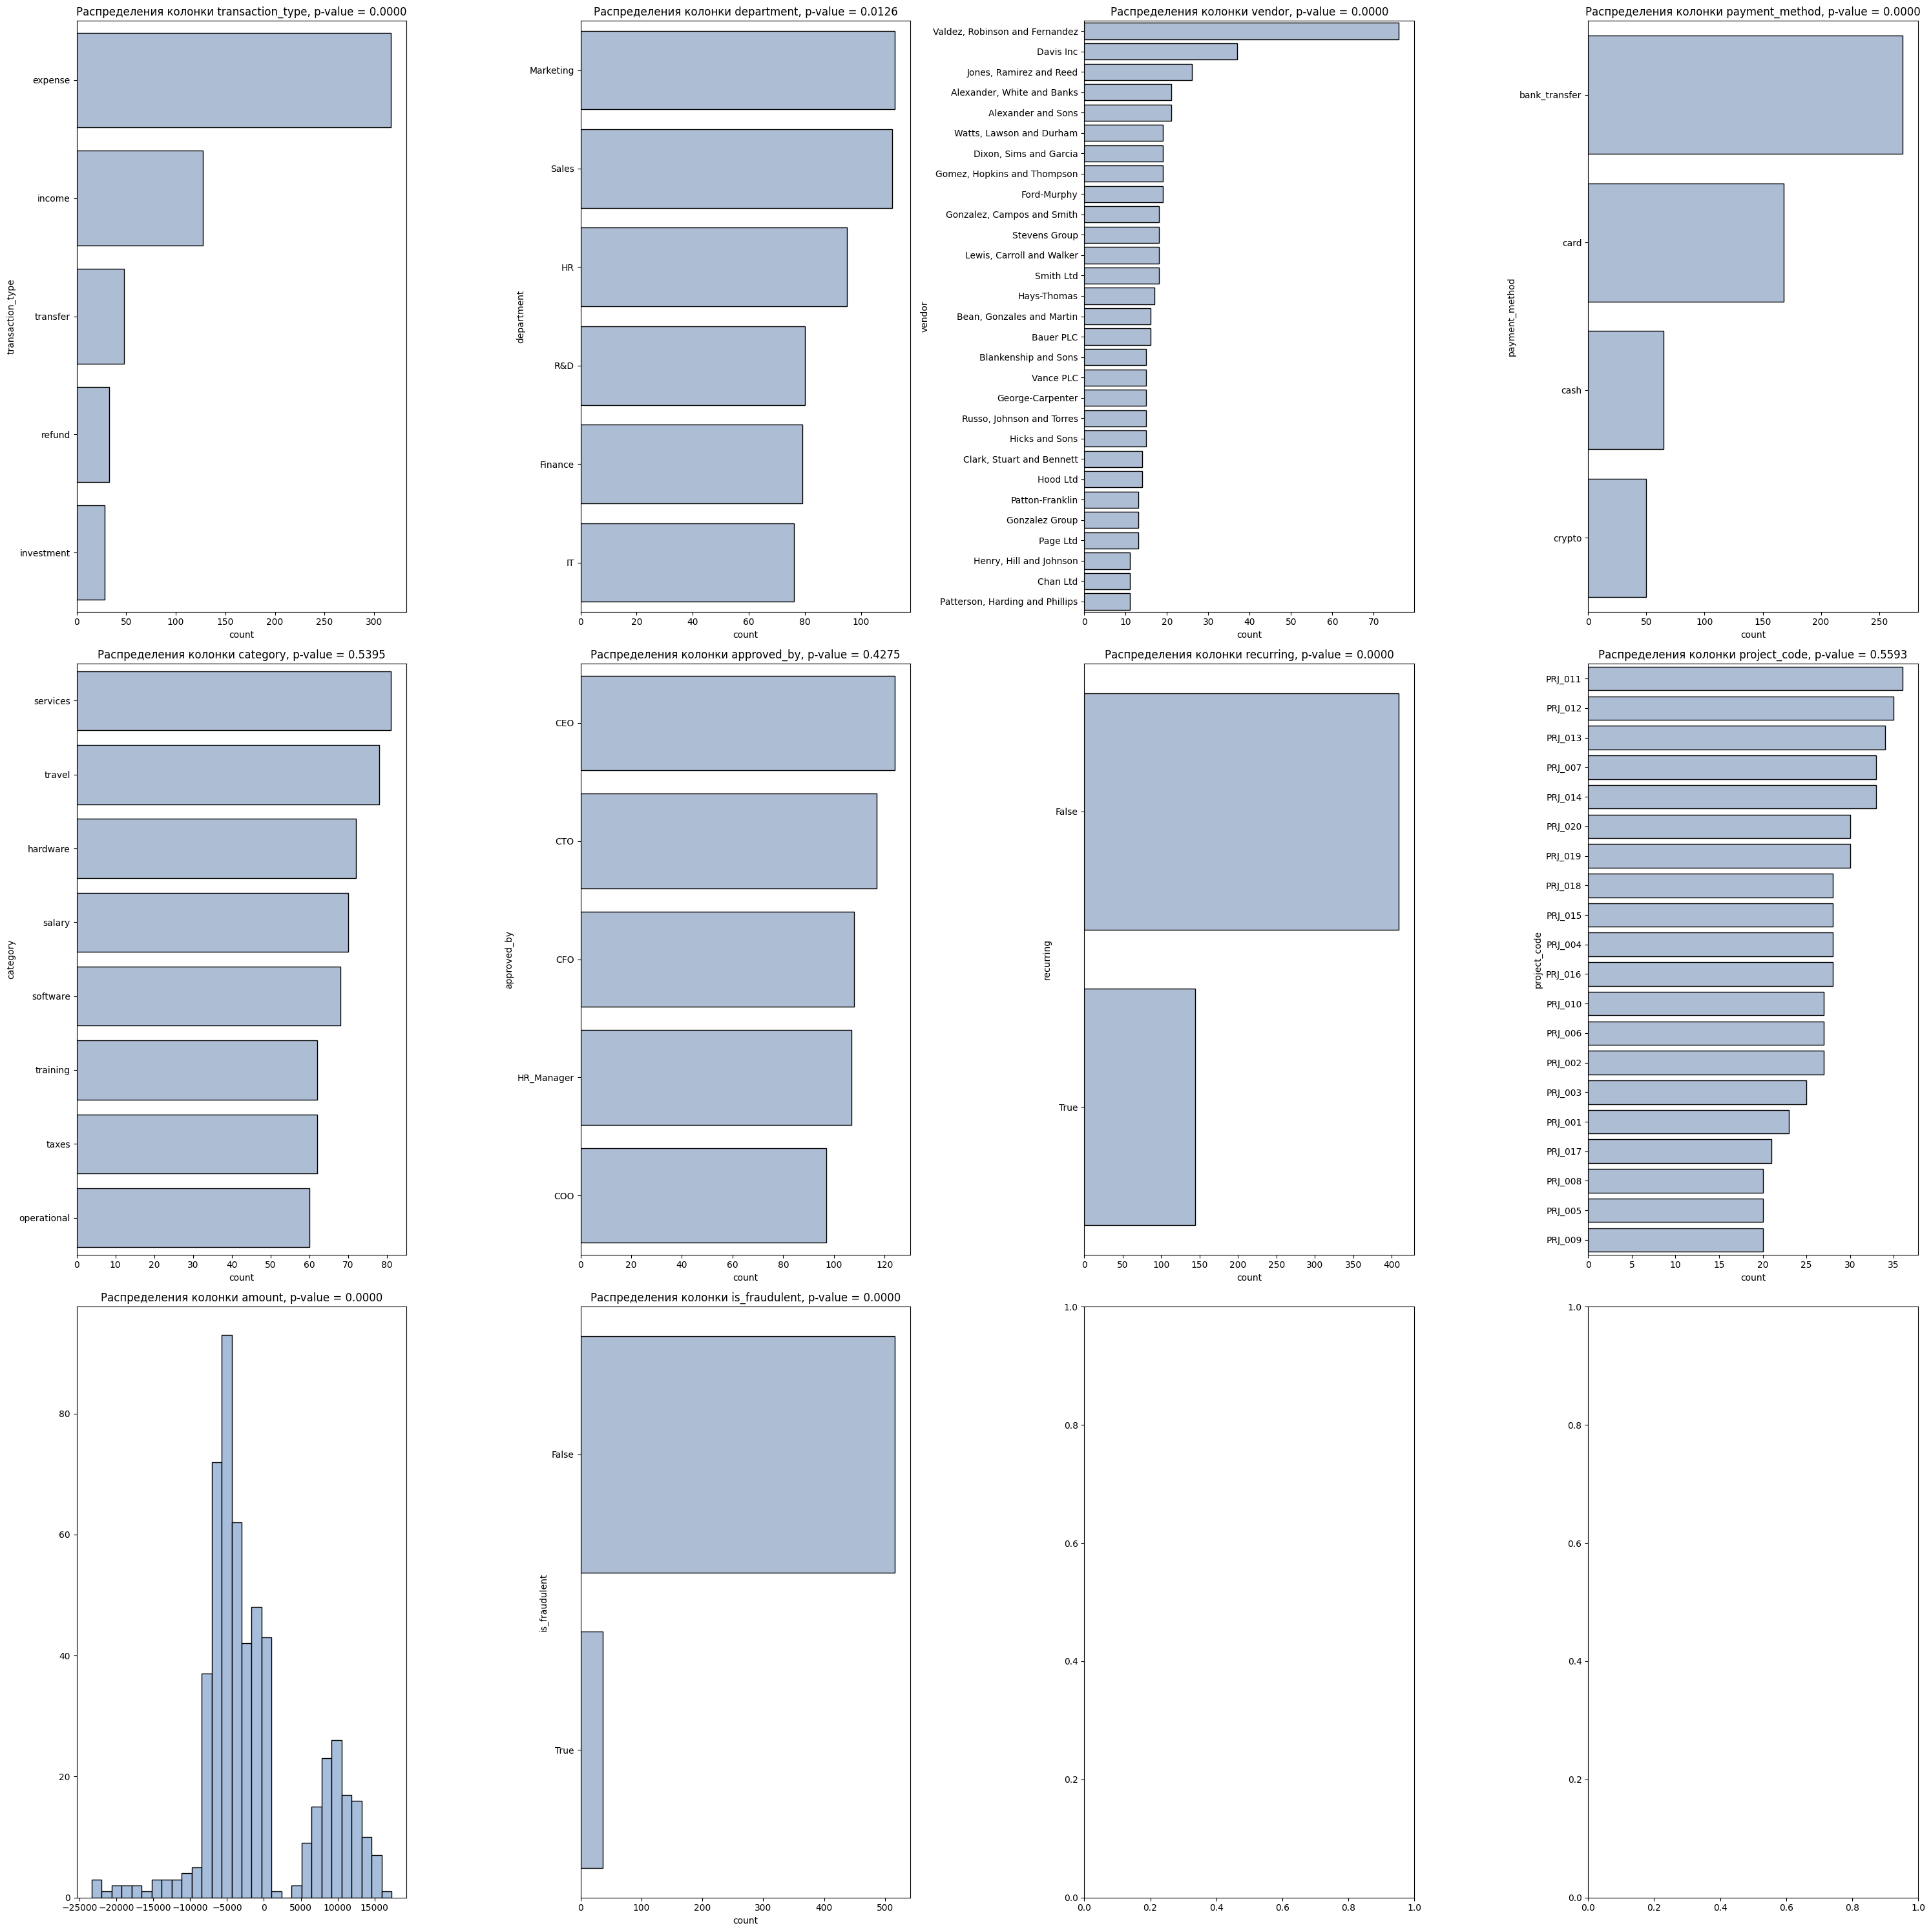

In [27]:
columns_distribution = ['transaction_type', 'department', 'vendor', 'payment_method',
       'category', 'approved_by', 'recurring', 'project_code', 'amount',
       'is_fraudulent']

fig, axes = plt.subplots(3, 4, figsize=(30, 30))
axes = axes.flatten()

for i, col in enumerate(columns_distribution[:len(axes)]):
  ax = axes[i]
  if df[col].dtype in ['int64', 'float64']:
    shap_stat, p_value = stats.shapiro(df[col])

    ax.hist(df[col], color='#a6bddb', bins=30, edgecolor='black')
    ax.set_title(f'Распределения колонки {col}, p-value = {p_value:.4f}')
  elif df[col].dtype in ['object', 'bool']:

    observed_counts = df[col].value_counts()
    expected_counts = [observed_counts.sum() / len(observed_counts)] * len(observed_counts)
    chi_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

    ax = sns.countplot(y=df[col].astype(str), ax=ax, color='#a6bddb', edgecolor='black', order=observed_counts.index)
    ax.set_title(f'Распределения колонки {col}, p-value = {p_value:.4f}')

plt.tight_layout()
plt.show()

Матрица графиков показывает, что колонка типа транзакций распределена не равномерна (p-value хи-квадрата = 0,0000) с чрезмерным преобладанием расходов. Аналогично и департаменты (p-value = 0.01), где маркетинг больше всего производит транзакций, а IT меньше всего. Большой перекос обнаружен и по продавцам с высокой монополией влияния "Weaver PLC" (p-value = 0.0000). Предпочтения методы оплаты также неравномерны с явным перекосом в сторону банковских платежей (p-value = 0.000). В свою очередь категории транзакций распределены достаточно равномерны (p-value = 0.54) о них в кампании не забывают. Что касается лиц, подтверждающих транзакции, то и здесь все, в целом, равномерно (p-value = 0.4275) все в той или иной "равной" статистической степени участвуют в подтверждении транзакций. Интересно, что по регулярности у нас наблюдается явный перевес "False" (p-value = 0.0000),  что говорит об относительных единоразовых транзакциях без долговременного вклада в общее дело. С учетом преобладания расходов над доходами - это может быть хорошей новостью. Что касается распределения транзакций по проектам, то и здесь, в целом, каждый проект в "равной" степени имеет операции (p-value = 0.56), компании о них не забывают, несмотря на высокое их количество. По суммам транзакции явно можно увидеть ненормальное распределение (p-value = 0.0000) в силу как положительных сумм (коих не так много), так и отрицательных (превалирование) в данных. Это говорит о больших издержках и требует внимания к себе. Последняя колонка с "Мошеннический платеж или нет" имеет преобладание метки "False" (p-value = 0.0000) что, в целом, и должно быть - ведь иначе организация юридически не должна была бы существовать
